In [90]:
from pandas.plotting import radviz
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [91]:
#初始化
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(2)
    #print("是"+str(n_x))
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros(shape=(n_h,1))
    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros(shape=(n_y,1))
    
    parameters={'w1':w1,'b1':b1,'w2':w2,'b2':b2}
    
    return parameters

In [92]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [93]:
def forward_propagation(X,parameters):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    #print("w2的shape："+str(w2.shape))
    #print("b2的shape"+str(b2.shape))
    z1=np.dot(w1,X)+b1
    a1=np.tanh(z1)
    #print("a1的shape："+str(a1.shape))
    z2=np.dot(w2,a1)+b2
    a2=sigmoid(z2)
    
    cache={'z1':z1,'a1':a1,'z2':z2,'a2':a2}
    
    return a2,cache


In [94]:
def compute_cost(a2,Y,parameters):
    m=Y.shape[1]
    
    logprobs=np.multiply(np.log(a2),Y)+np.multiply((1-Y),np.log(1-a2))
    cost=-np.sum(logprobs)/m
    
    return cost

In [95]:
def backward_propagation(parameters,cache,X,Y):
    m=Y.shape[1]
    
    w2=parameters['w2']
    
    a1=cache['a1']
    a2=cache['a2']
    
    dz2=a2-Y
    dw2=(1/m)*np.dot(dz2,a1.T)
    db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
    #print("back db2"+str(db2.shape))
    dz1=np.multiply(np.dot(w2.T,dz2),1-np.power(a1,2))
    dw1=(1/m)*np.dot(dz1,X.T)
    db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)
    
    grads={'dw1':dw1,'db1':db1,'dw2':dw2,'db2':db2}
    
    return grads

In [96]:
def update_parameters(parameters,grads,learning_rate=0.4):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = grads['dw1']
    db1 = grads['db1']
    dw2 = grads['dw2']
    db2 = grads['db2']

    # 更新参数
    w1 = w1 - dw1 * learning_rate
    b1 = b1 - db1 * learning_rate
    w2 = w2 - dw2 * learning_rate
    b2 = b2 - db2 * learning_rate

    parameters = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

    return parameters

In [97]:
def nn_model(X,Y,n_h,n_input,n_output,num_interations=10000,print_cost=False):
    np.random.seed(3)
    
    n_x=n_input
    #print(n_x)
    n_y=n_output
    costgross=np.zeros((num_interations,1))
    parameters=initialize_parameters(n_x,n_h,n_y)
    
    for i in range(0,num_interations):
        #print(i)
        a2,cache=forward_propagation(X,parameters)
        #print(a2)
        cost=compute_cost(a2,Y,parameters)
        costgross[i]=cost
        grads=backward_propagation(parameters,cache,X,Y)
        #print(grads)
        parameters=update_parameters(parameters,grads)
        #print(parameters)
        print('迭代第%i次，代价函数是：%f' %(i,cost))
    xrange=np.arange(0,num_interations)    
    plt.plot(xrange,costgross,label="cost")
    plt.xlabel("number of cost")
    plt.ylabel("cost")
    plt.show()
    return parameters

In [104]:
def predict(parameters,x_test,y_test):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    z1=np.dot(w1,X)+b1
    a1=np.tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=sigmoid(z2)
    
    n_rows=y_test.shape[0]
    n_cols=y_test.shape[1]
    
    print(n_rows,n_cols)
    
    output=np.empty(shape=(n_rows,n_cols),dtype=int)
    
    print(str(output.shape))
    
    for i in range(n_rows):
        for j in range(n_cols):
            if a2[i][j]>0.4:
                output[i][j]=1
            else:
                output[i][j]=0
    print("预测结果：")
    print(output)
    print("实际结果：")
    print(y_test)
    
    count=0
    for k in range(0,n_cols):
        if output[0][k]==y_test[0][k] and output[1][k]==y_test[1][k] and  output[2][k]==y_test[2][k]:
            count=count+1
        else:
            print(k)
            
    acc=count/int(y_test.shape[1])*100
    print("准确率是：%.2f%%" % acc)
    
    return output

[[0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0]
 [1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1]]
(3, 30)
迭代第0次，代价函数是：2.080026
迭代第1次，代价函数是：2.045623
迭代第2次，代价函数是：2.015654
迭代第3次，代价函数是：1.984820
迭代第4次，代价函数是：1.950101
迭代第5次，代价函数是：1.917337
迭代第6次，代价函数是：1.895682
迭代第7次，代价函数是：1.881392
迭代第8次，代价函数是：1.865532
迭代第9次，代价函数是：1.841798
迭代第10次，代价函数是：1.804911
迭代第11次，代价函数是：1.750045
迭代第12次，代价函数是：1.674857
迭代第13次，代价函数是：1.582620
迭代第14次，代价函数是：1.483079
迭代第15次，代价函数是：1.388322
迭代第16次，代价函数是：1.307068
迭代第17次，代价函数是：1.245825
迭代第18次，代价函数是：1.242779
迭代第19次，代价函数是：1.570716
迭代第20次，代价函数是：2.932304
迭代第21次，代价函数是：2.123595
迭代第22次，代价函数是：1.842446
迭代第23次，代价函数是：1.678516
迭代第24次，代价函数是：1.540189
迭代第25次，代价函数是：1.429936
迭代第26次，代价函数是：1.343287
迭代第27次，代价函数是：1.278601
迭代第28次，代价函数是：1.258706
迭代第29次，代价函数是：1.263559
迭代第30次，代价函数是：1.714880
迭代第31次，代价函数是：2.724185
迭代第32次，代价函数是：2.229334
迭代第33次，代价函数是：1.676904
迭代第34次，代价函数是：1.438282
迭代第35次，代价函数是：1.344134
迭代第36次，代价函数是：1.28414

迭代第376次，代价函数是：0.919025
迭代第377次，代价函数是：0.920188
迭代第378次，代价函数是：0.921771
迭代第379次，代价函数是：0.935010
迭代第380次，代价函数是：0.917063
迭代第381次，代价函数是：0.914553
迭代第382次，代价函数是：0.911934
迭代第383次，代价函数是：0.908784
迭代第384次，代价函数是：0.905268
迭代第385次，代价函数是：0.902099
迭代第386次，代价函数是：0.899478
迭代第387次，代价函数是：0.725350
迭代第388次，代价函数是：0.875413
迭代第389次，代价函数是：1.036206
迭代第390次，代价函数是：0.918875
迭代第391次，代价函数是：0.907273
迭代第392次，代价函数是：0.912457
迭代第393次，代价函数是：0.950310
迭代第394次，代价函数是：0.918802
迭代第395次，代价函数是：0.911878
迭代第396次，代价函数是：0.903804
迭代第397次，代价函数是：0.890720
迭代第398次，代价函数是：0.868011
迭代第399次，代价函数是：0.794085
迭代第400次，代价函数是：0.518083
迭代第401次，代价函数是：0.636091
迭代第402次，代价函数是：1.147859
迭代第403次，代价函数是：0.915943
迭代第404次，代价函数是：0.949227
迭代第405次，代价函数是：0.908083
迭代第406次，代价函数是：0.891331
迭代第407次，代价函数是：0.875236
迭代第408次，代价函数是：0.870385
迭代第409次，代价函数是：0.851790
迭代第410次，代价函数是：0.836886
迭代第411次，代价函数是：0.860886
迭代第412次，代价函数是：1.182368
迭代第413次，代价函数是：0.852843
迭代第414次，代价函数是：1.140434
迭代第415次，代价函数是：0.899222
迭代第416次，代价函数是：0.792692
迭代第417次，代价函数是：0.984655
迭代第418次，代价函数是：0.909512
迭代第419次，代价函

迭代第744次，代价函数是：0.300997
迭代第745次，代价函数是：0.531728
迭代第746次，代价函数是：1.419086
迭代第747次，代价函数是：1.012045
迭代第748次，代价函数是：1.573480
迭代第749次，代价函数是：0.775421
迭代第750次，代价函数是：0.875371
迭代第751次，代价函数是：1.049759
迭代第752次，代价函数是：0.528060
迭代第753次，代价函数是：0.538784
迭代第754次，代价函数是：0.708498
迭代第755次，代价函数是：0.600895
迭代第756次，代价函数是：0.595296
迭代第757次，代价函数是：0.681423
迭代第758次，代价函数是：0.461815
迭代第759次，代价函数是：0.585426
迭代第760次，代价函数是：0.685426
迭代第761次，代价函数是：0.708606
迭代第762次，代价函数是：0.430930
迭代第763次，代价函数是：0.281591
迭代第764次，代价函数是：0.291009
迭代第765次，代价函数是：0.438297
迭代第766次，代价函数是：0.946955
迭代第767次，代价函数是：1.298168
迭代第768次，代价函数是：0.907444
迭代第769次，代价函数是：0.801840
迭代第770次，代价函数是：0.612817
迭代第771次，代价函数是：0.723930
迭代第772次，代价函数是：0.982969
迭代第773次，代价函数是：0.926088
迭代第774次，代价函数是：0.891890
迭代第775次，代价函数是：0.796832
迭代第776次，代价函数是：0.776590
迭代第777次，代价函数是：0.508439
迭代第778次，代价函数是：0.459410
迭代第779次，代价函数是：0.498026
迭代第780次，代价函数是：0.438531
迭代第781次，代价函数是：0.471639
迭代第782次，代价函数是：0.456167
迭代第783次，代价函数是：0.534481
迭代第784次，代价函数是：0.660013
迭代第785次，代价函数是：0.957186
迭代第786次，代价函数是：0.806702
迭代第787次，代价函

迭代第1327次，代价函数是：0.167348
迭代第1328次，代价函数是：0.157647
迭代第1329次，代价函数是：0.168827
迭代第1330次，代价函数是：0.156489
迭代第1331次，代价函数是：0.161871
迭代第1332次，代价函数是：0.151998
迭代第1333次，代价函数是：0.160356
迭代第1334次，代价函数是：0.155014
迭代第1335次，代价函数是：0.178401
迭代第1336次，代价函数是：0.154290
迭代第1337次，代价函数是：0.143967
迭代第1338次，代价函数是：0.133019
迭代第1339次，代价函数是：0.158094
迭代第1340次，代价函数是：0.210203
迭代第1341次，代价函数是：0.568081
迭代第1342次，代价函数是：0.246315
迭代第1343次，代价函数是：0.154693
迭代第1344次，代价函数是：0.132582
迭代第1345次，代价函数是：0.140315
迭代第1346次，代价函数是：0.221103
迭代第1347次，代价函数是：0.160392
迭代第1348次，代价函数是：0.354957
迭代第1349次，代价函数是：0.162329
迭代第1350次，代价函数是：0.141471
迭代第1351次，代价函数是：0.155102
迭代第1352次，代价函数是：0.248369
迭代第1353次，代价函数是：0.153849
迭代第1354次，代价函数是：0.153215
迭代第1355次，代价函数是：0.167196
迭代第1356次，代价函数是：0.278069
迭代第1357次，代价函数是：0.168655
迭代第1358次，代价函数是：0.129156
迭代第1359次，代价函数是：0.119148
迭代第1360次，代价函数是：0.118974
迭代第1361次，代价函数是：0.161329
迭代第1362次，代价函数是：0.518517
迭代第1363次，代价函数是：0.220169
迭代第1364次，代价函数是：0.151844
迭代第1365次，代价函数是：0.130105
迭代第1366次，代价函数是：0.125699
迭代第1367次，代价函数是：0.146456
迭代第1368次，代价函数是：0

迭代第1833次，代价函数是：0.117404
迭代第1834次，代价函数是：0.143993
迭代第1835次，代价函数是：0.149652
迭代第1836次，代价函数是：0.367379
迭代第1837次，代价函数是：0.177917
迭代第1838次，代价函数是：0.194659
迭代第1839次，代价函数是：0.114883
迭代第1840次，代价函数是：0.113084
迭代第1841次，代价函数是：0.127591
迭代第1842次，代价函数是：0.245929
迭代第1843次，代价函数是：0.114411
迭代第1844次，代价函数是：0.110321
迭代第1845次，代价函数是：0.116404
迭代第1846次，代价函数是：0.179696
迭代第1847次，代价函数是：0.118475
迭代第1848次，代价函数是：0.167208
迭代第1849次，代价函数是：0.118576
迭代第1850次，代价函数是：0.178205
迭代第1851次，代价函数是：0.114497
迭代第1852次，代价函数是：0.138117
迭代第1853次，代价函数是：0.139062
迭代第1854次，代价函数是：0.306364
迭代第1855次，代价函数是：0.135074
迭代第1856次，代价函数是：0.144418
迭代第1857次，代价函数是：0.130818
迭代第1858次，代价函数是：0.171021
迭代第1859次，代价函数是：0.132758
迭代第1860次，代价函数是：0.225508
迭代第1861次，代价函数是：0.156887
迭代第1862次，代价函数是：0.185229
迭代第1863次，代价函数是：0.110390
迭代第1864次，代价函数是：0.110500
迭代第1865次，代价函数是：0.128332
迭代第1866次，代价函数是：0.263066
迭代第1867次，代价函数是：0.123402
迭代第1868次，代价函数是：0.122344
迭代第1869次，代价函数是：0.125037
迭代第1870次，代价函数是：0.203549
迭代第1871次，代价函数是：0.111995
迭代第1872次，代价函数是：0.118360
迭代第1873次，代价函数是：0.134349
迭代第1874次，代价函数是：0

迭代第2178次，代价函数是：0.130144
迭代第2179次，代价函数是：0.129519
迭代第2180次，代价函数是：0.254063
迭代第2181次，代价函数是：0.120344
迭代第2182次，代价函数是：0.112633
迭代第2183次，代价函数是：0.117677
迭代第2184次，代价函数是：0.117809
迭代第2185次，代价函数是：0.190168
迭代第2186次，代价函数是：0.109334
迭代第2187次，代价函数是：0.107780
迭代第2188次，代价函数是：0.117262
迭代第2189次，代价函数是：0.205150
迭代第2190次，代价函数是：0.115167
迭代第2191次，代价函数是：0.113869
迭代第2192次，代价函数是：0.113785
迭代第2193次，代价函数是：0.173169
迭代第2194次，代价函数是：0.109465
迭代第2195次，代价函数是：0.120843
迭代第2196次，代价函数是：0.115025
迭代第2197次，代价函数是：0.182746
迭代第2198次，代价函数是：0.107721
迭代第2199次，代价函数是：0.104369
迭代第2200次，代价函数是：0.112299
迭代第2201次，代价函数是：0.181376
迭代第2202次，代价函数是：0.110358
迭代第2203次，代价函数是：0.115683
迭代第2204次，代价函数是：0.116317
迭代第2205次，代价函数是：0.195373
迭代第2206次，代价函数是：0.109991
迭代第2207次，代价函数是：0.104560
迭代第2208次，代价函数是：0.108818
迭代第2209次，代价函数是：0.156930
迭代第2210次，代价函数是：0.117857
迭代第2211次，代价函数是：0.175041
迭代第2212次，代价函数是：0.105623
迭代第2213次，代价函数是：0.101116
迭代第2214次，代价函数是：0.102951
迭代第2215次，代价函数是：0.127064
迭代第2216次，代价函数是：0.132172
迭代第2217次，代价函数是：0.272234
迭代第2218次，代价函数是：0.123680
迭代第2219次，代价函数是：0

迭代第2538次，代价函数是：0.104204
迭代第2539次，代价函数是：0.126467
迭代第2540次，代价函数是：0.104036
迭代第2541次，代价函数是：0.127677
迭代第2542次，代价函数是：0.104105
迭代第2543次，代价函数是：0.126408
迭代第2544次，代价函数是：0.103966
迭代第2545次，代价函数是：0.127380
迭代第2546次，代价函数是：0.104000
迭代第2547次，代价函数是：0.126219
迭代第2548次，代价函数是：0.103901
迭代第2549次，代价函数是：0.127213
迭代第2550次，代价函数是：0.103897
迭代第2551次，代价函数是：0.125939
迭代第2552次，代价函数是：0.103832
迭代第2553次，代价函数是：0.127110
迭代第2554次，代价函数是：0.103803
迭代第2555次，代价函数是：0.125638
迭代第2556次，代价函数是：0.103756
迭代第2557次，代价函数是：0.127003
迭代第2558次，代价函数是：0.103716
迭代第2559次，代价函数是：0.125369
迭代第2560次，代价函数是：0.103674
迭代第2561次，代价函数是：0.126854
迭代第2562次，代价函数是：0.103634
迭代第2563次，代价函数是：0.125149
迭代第2564次，代价函数是：0.103591
迭代第2565次，代价函数是：0.126662
迭代第2566次，代价函数是：0.103553
迭代第2567次，代价函数是：0.124965
迭代第2568次，代价函数是：0.103508
迭代第2569次，代价函数是：0.126449
迭代第2570次，代价函数是：0.103470
迭代第2571次，代价函数是：0.124792
迭代第2572次，代价函数是：0.103428
迭代第2573次，代价函数是：0.126243
迭代第2574次，代价函数是：0.103384
迭代第2575次，代价函数是：0.124605
迭代第2576次，代价函数是：0.103351
迭代第2577次，代价函数是：0.126065
迭代第2578次，代价函数是：0.103296
迭代第2579次，代价函数是：0

迭代第3048次，代价函数是：0.134377
迭代第3049次，代价函数是：0.095139
迭代第3050次，代价函数是：0.088333
迭代第3051次，代价函数是：0.090113
迭代第3052次，代价函数是：0.106556
迭代第3053次，代价函数是：0.100427
迭代第3054次，代价函数是：0.131240
迭代第3055次，代价函数是：0.091720
迭代第3056次，代价函数是：0.087019
迭代第3057次，代价函数是：0.088476
迭代第3058次，代价函数是：0.096161
迭代第3059次，代价函数是：0.131540
迭代第3060次，代价函数是：0.094366
迭代第3061次，代价函数是：0.088294
迭代第3062次，代价函数是：0.090486
迭代第3063次，代价函数是：0.108587
迭代第3064次，代价函数是：0.098404
迭代第3065次，代价函数是：0.121665
迭代第3066次，代价函数是：0.090045
迭代第3067次，代价函数是：0.086704
迭代第3068次，代价函数是：0.087873
迭代第3069次，代价函数是：0.097169
迭代第3070次，代价函数是：0.106704
迭代第3071次，代价函数是：0.165037
迭代第3072次，代价函数是：0.097998
迭代第3073次，代价函数是：0.088230
迭代第3074次，代价函数是：0.086111
迭代第3075次，代价函数是：0.086853
迭代第3076次，代价函数是：0.092447
迭代第3077次，代价函数是：0.105328
迭代第3078次，代价函数是：0.165106
迭代第3079次，代价函数是：0.099174
迭代第3080次，代价函数是：0.088596
迭代第3081次，代价函数是：0.085826
迭代第3082次，代价函数是：0.085939
迭代第3083次，代价函数是：0.087688
迭代第3084次，代价函数是：0.097633
迭代第3085次，代价函数是：0.106518
迭代第3086次，代价函数是：0.163493
迭代第3087次，代价函数是：0.097223
迭代第3088次，代价函数是：0.087804
迭代第3089次，代价函数是：0

迭代第3780次，代价函数是：0.079586
迭代第3781次，代价函数是：0.081528
迭代第3782次，代价函数是：0.080202
迭代第3783次，代价函数是：0.087403
迭代第3784次，代价函数是：0.079511
迭代第3785次，代价函数是：0.081535
迭代第3786次，代价函数是：0.080113
迭代第3787次，代价函数是：0.087171
迭代第3788次，代价函数是：0.079436
迭代第3789次，代价函数是：0.081546
迭代第3790次，代价函数是：0.080023
迭代第3791次，代价函数是：0.086936
迭代第3792次，代价函数是：0.079363
迭代第3793次，代价函数是：0.081560
迭代第3794次，代价函数是：0.079932
迭代第3795次，代价函数是：0.086696
迭代第3796次，代价函数是：0.079291
迭代第3797次，代价函数是：0.081577
迭代第3798次，代价函数是：0.079840
迭代第3799次，代价函数是：0.086453
迭代第3800次，代价函数是：0.079221
迭代第3801次，代价函数是：0.081597
迭代第3802次，代价函数是：0.079746
迭代第3803次，代价函数是：0.086205
迭代第3804次，代价函数是：0.079151
迭代第3805次，代价函数是：0.081621
迭代第3806次，代价函数是：0.079652
迭代第3807次，代价函数是：0.085952
迭代第3808次，代价函数是：0.079083
迭代第3809次，代价函数是：0.081647
迭代第3810次，代价函数是：0.079556
迭代第3811次，代价函数是：0.085695
迭代第3812次，代价函数是：0.079015
迭代第3813次，代价函数是：0.081677
迭代第3814次，代价函数是：0.079458
迭代第3815次，代价函数是：0.085433
迭代第3816次，代价函数是：0.078949
迭代第3817次，代价函数是：0.081708
迭代第3818次，代价函数是：0.079359
迭代第3819次，代价函数是：0.085166
迭代第3820次，代价函数是：0.078883
迭代第3821次，代价函数是：0

迭代第4127次，代价函数是：0.073058
迭代第4128次，代价函数是：0.071903
迭代第4129次，代价函数是：0.072995
迭代第4130次，代价函数是：0.071856
迭代第4131次，代价函数是：0.072932
迭代第4132次，代价函数是：0.071809
迭代第4133次，代价函数是：0.072869
迭代第4134次，代价函数是：0.071762
迭代第4135次，代价函数是：0.072807
迭代第4136次，代价函数是：0.071714
迭代第4137次，代价函数是：0.072744
迭代第4138次，代价函数是：0.071667
迭代第4139次，代价函数是：0.072681
迭代第4140次，代价函数是：0.071619
迭代第4141次，代价函数是：0.072618
迭代第4142次，代价函数是：0.071572
迭代第4143次，代价函数是：0.072555
迭代第4144次，代价函数是：0.071524
迭代第4145次，代价函数是：0.072493
迭代第4146次，代价函数是：0.071477
迭代第4147次，代价函数是：0.072430
迭代第4148次，代价函数是：0.071429
迭代第4149次，代价函数是：0.072367
迭代第4150次，代价函数是：0.071381
迭代第4151次，代价函数是：0.072304
迭代第4152次，代价函数是：0.071333
迭代第4153次，代价函数是：0.072241
迭代第4154次，代价函数是：0.071285
迭代第4155次，代价函数是：0.072179
迭代第4156次，代价函数是：0.071237
迭代第4157次，代价函数是：0.072116
迭代第4158次，代价函数是：0.071189
迭代第4159次，代价函数是：0.072053
迭代第4160次，代价函数是：0.071141
迭代第4161次，代价函数是：0.071990
迭代第4162次，代价函数是：0.071093
迭代第4163次，代价函数是：0.071927
迭代第4164次，代价函数是：0.071044
迭代第4165次，代价函数是：0.071865
迭代第4166次，代价函数是：0.070996
迭代第4167次，代价函数是：0.071802
迭代第4168次，代价函数是：0

迭代第4552次，代价函数是：0.063969
迭代第4553次，代价函数是：0.063960
迭代第4554次，代价函数是：0.063952
迭代第4555次，代价函数是：0.063944
迭代第4556次，代价函数是：0.063935
迭代第4557次，代价函数是：0.063927
迭代第4558次，代价函数是：0.063919
迭代第4559次，代价函数是：0.063911
迭代第4560次，代价函数是：0.063902
迭代第4561次，代价函数是：0.063894
迭代第4562次，代价函数是：0.063886
迭代第4563次，代价函数是：0.063878
迭代第4564次，代价函数是：0.063869
迭代第4565次，代价函数是：0.063861
迭代第4566次，代价函数是：0.063853
迭代第4567次，代价函数是：0.063845
迭代第4568次，代价函数是：0.063836
迭代第4569次，代价函数是：0.063828
迭代第4570次，代价函数是：0.063820
迭代第4571次，代价函数是：0.063812
迭代第4572次，代价函数是：0.063804
迭代第4573次，代价函数是：0.063795
迭代第4574次，代价函数是：0.063787
迭代第4575次，代价函数是：0.063779
迭代第4576次，代价函数是：0.063771
迭代第4577次，代价函数是：0.063763
迭代第4578次，代价函数是：0.063754
迭代第4579次，代价函数是：0.063746
迭代第4580次，代价函数是：0.063738
迭代第4581次，代价函数是：0.063730
迭代第4582次，代价函数是：0.063722
迭代第4583次，代价函数是：0.063714
迭代第4584次，代价函数是：0.063706
迭代第4585次，代价函数是：0.063697
迭代第4586次，代价函数是：0.063689
迭代第4587次，代价函数是：0.063681
迭代第4588次，代价函数是：0.063673
迭代第4589次，代价函数是：0.063665
迭代第4590次，代价函数是：0.063657
迭代第4591次，代价函数是：0.063649
迭代第4592次，代价函数是：0.063641
迭代第4593次，代价函数是：0

迭代第5208次，代价函数是：0.059479
迭代第5209次，代价函数是：0.059473
迭代第5210次，代价函数是：0.059467
迭代第5211次，代价函数是：0.059462
迭代第5212次，代价函数是：0.059456
迭代第5213次，代价函数是：0.059451
迭代第5214次，代价函数是：0.059445
迭代第5215次，代价函数是：0.059439
迭代第5216次，代价函数是：0.059434
迭代第5217次，代价函数是：0.059428
迭代第5218次，代价函数是：0.059423
迭代第5219次，代价函数是：0.059417
迭代第5220次，代价函数是：0.059411
迭代第5221次，代价函数是：0.059406
迭代第5222次，代价函数是：0.059400
迭代第5223次，代价函数是：0.059395
迭代第5224次，代价函数是：0.059389
迭代第5225次，代价函数是：0.059383
迭代第5226次，代价函数是：0.059378
迭代第5227次，代价函数是：0.059372
迭代第5228次，代价函数是：0.059367
迭代第5229次，代价函数是：0.059361
迭代第5230次，代价函数是：0.059355
迭代第5231次，代价函数是：0.059350
迭代第5232次，代价函数是：0.059344
迭代第5233次，代价函数是：0.059339
迭代第5234次，代价函数是：0.059333
迭代第5235次，代价函数是：0.059328
迭代第5236次，代价函数是：0.059322
迭代第5237次，代价函数是：0.059316
迭代第5238次，代价函数是：0.059311
迭代第5239次，代价函数是：0.059305
迭代第5240次，代价函数是：0.059300
迭代第5241次，代价函数是：0.059294
迭代第5242次，代价函数是：0.059289
迭代第5243次，代价函数是：0.059283
迭代第5244次，代价函数是：0.059278
迭代第5245次，代价函数是：0.059272
迭代第5246次，代价函数是：0.059267
迭代第5247次，代价函数是：0.059261
迭代第5248次，代价函数是：0.059256
迭代第5249次，代价函数是：0

迭代第5556次，代价函数是：0.057681
迭代第5557次，代价函数是：0.057676
迭代第5558次，代价函数是：0.057672
迭代第5559次，代价函数是：0.057667
迭代第5560次，代价函数是：0.057662
迭代第5561次，代价函数是：0.057657
迭代第5562次，代价函数是：0.057653
迭代第5563次，代价函数是：0.057648
迭代第5564次，代价函数是：0.057643
迭代第5565次，代价函数是：0.057638
迭代第5566次，代价函数是：0.057634
迭代第5567次，代价函数是：0.057629
迭代第5568次，代价函数是：0.057624
迭代第5569次，代价函数是：0.057620
迭代第5570次，代价函数是：0.057615
迭代第5571次，代价函数是：0.057610
迭代第5572次，代价函数是：0.057605
迭代第5573次，代价函数是：0.057601
迭代第5574次，代价函数是：0.057596
迭代第5575次，代价函数是：0.057591
迭代第5576次，代价函数是：0.057587
迭代第5577次，代价函数是：0.057582
迭代第5578次，代价函数是：0.057577
迭代第5579次，代价函数是：0.057573
迭代第5580次，代价函数是：0.057568
迭代第5581次，代价函数是：0.057563
迭代第5582次，代价函数是：0.057559
迭代第5583次，代价函数是：0.057554
迭代第5584次，代价函数是：0.057549
迭代第5585次，代价函数是：0.057544
迭代第5586次，代价函数是：0.057540
迭代第5587次，代价函数是：0.057535
迭代第5588次，代价函数是：0.057530
迭代第5589次，代价函数是：0.057526
迭代第5590次，代价函数是：0.057521
迭代第5591次，代价函数是：0.057516
迭代第5592次，代价函数是：0.057512
迭代第5593次，代价函数是：0.057507
迭代第5594次，代价函数是：0.057502
迭代第5595次，代价函数是：0.057498
迭代第5596次，代价函数是：0.057493
迭代第5597次，代价函数是：0

迭代第5947次，代价函数是：0.055979
迭代第5948次，代价函数是：0.055975
迭代第5949次，代价函数是：0.055971
迭代第5950次，代价函数是：0.055967
迭代第5951次，代价函数是：0.055963
迭代第5952次，代价函数是：0.055959
迭代第5953次，代价函数是：0.055955
迭代第5954次，代价函数是：0.055951
迭代第5955次，代价函数是：0.055947
迭代第5956次，代价函数是：0.055943
迭代第5957次，代价函数是：0.055939
迭代第5958次，代价函数是：0.055935
迭代第5959次，代价函数是：0.055931
迭代第5960次，代价函数是：0.055927
迭代第5961次，代价函数是：0.055923
迭代第5962次，代价函数是：0.055919
迭代第5963次，代价函数是：0.055915
迭代第5964次，代价函数是：0.055911
迭代第5965次，代价函数是：0.055907
迭代第5966次，代价函数是：0.055903
迭代第5967次，代价函数是：0.055899
迭代第5968次，代价函数是：0.055895
迭代第5969次，代价函数是：0.055891
迭代第5970次，代价函数是：0.055887
迭代第5971次，代价函数是：0.055883
迭代第5972次，代价函数是：0.055879
迭代第5973次，代价函数是：0.055875
迭代第5974次，代价函数是：0.055871
迭代第5975次，代价函数是：0.055867
迭代第5976次，代价函数是：0.055864
迭代第5977次，代价函数是：0.055860
迭代第5978次，代价函数是：0.055856
迭代第5979次，代价函数是：0.055852
迭代第5980次，代价函数是：0.055848
迭代第5981次，代价函数是：0.055844
迭代第5982次，代价函数是：0.055840
迭代第5983次，代价函数是：0.055836
迭代第5984次，代价函数是：0.055832
迭代第5985次，代价函数是：0.055828
迭代第5986次，代价函数是：0.055824
迭代第5987次，代价函数是：0.055820
迭代第5988次，代价函数是：0

迭代第6378次，代价函数是：0.054381
迭代第6379次，代价函数是：0.054378
迭代第6380次，代价函数是：0.054374
迭代第6381次，代价函数是：0.054371
迭代第6382次，代价函数是：0.054367
迭代第6383次，代价函数是：0.054364
迭代第6384次，代价函数是：0.054360
迭代第6385次，代价函数是：0.054357
迭代第6386次，代价函数是：0.054353
迭代第6387次，代价函数是：0.054350
迭代第6388次，代价函数是：0.054347
迭代第6389次，代价函数是：0.054343
迭代第6390次，代价函数是：0.054340
迭代第6391次，代价函数是：0.054336
迭代第6392次，代价函数是：0.054333
迭代第6393次，代价函数是：0.054329
迭代第6394次，代价函数是：0.054326
迭代第6395次，代价函数是：0.054323
迭代第6396次，代价函数是：0.054319
迭代第6397次，代价函数是：0.054316
迭代第6398次，代价函数是：0.054312
迭代第6399次，代价函数是：0.054309
迭代第6400次，代价函数是：0.054305
迭代第6401次，代价函数是：0.054302
迭代第6402次，代价函数是：0.054299
迭代第6403次，代价函数是：0.054295
迭代第6404次，代价函数是：0.054292
迭代第6405次，代价函数是：0.054288
迭代第6406次，代价函数是：0.054285
迭代第6407次，代价函数是：0.054282
迭代第6408次，代价函数是：0.054278
迭代第6409次，代价函数是：0.054275
迭代第6410次，代价函数是：0.054271
迭代第6411次，代价函数是：0.054268
迭代第6412次，代价函数是：0.054264
迭代第6413次，代价函数是：0.054261
迭代第6414次，代价函数是：0.054258
迭代第6415次，代价函数是：0.054254
迭代第6416次，代价函数是：0.054251
迭代第6417次，代价函数是：0.054247
迭代第6418次，代价函数是：0.054244
迭代第6419次，代价函数是：0

迭代第7058次，代价函数是：0.052249
迭代第7059次，代价函数是：0.052246
迭代第7060次，代价函数是：0.052243
迭代第7061次，代价函数是：0.052240
迭代第7062次，代价函数是：0.052237
迭代第7063次，代价函数是：0.052234
迭代第7064次，代价函数是：0.052231
迭代第7065次，代价函数是：0.052228
迭代第7066次，代价函数是：0.052226
迭代第7067次，代价函数是：0.052223
迭代第7068次，代价函数是：0.052220
迭代第7069次，代价函数是：0.052217
迭代第7070次，代价函数是：0.052214
迭代第7071次，代价函数是：0.052211
迭代第7072次，代价函数是：0.052208
迭代第7073次，代价函数是：0.052205
迭代第7074次，代价函数是：0.052203
迭代第7075次，代价函数是：0.052200
迭代第7076次，代价函数是：0.052197
迭代第7077次，代价函数是：0.052194
迭代第7078次，代价函数是：0.052191
迭代第7079次，代价函数是：0.052188
迭代第7080次，代价函数是：0.052185
迭代第7081次，代价函数是：0.052182
迭代第7082次，代价函数是：0.052180
迭代第7083次，代价函数是：0.052177
迭代第7084次，代价函数是：0.052174
迭代第7085次，代价函数是：0.052171
迭代第7086次，代价函数是：0.052168
迭代第7087次，代价函数是：0.052165
迭代第7088次，代价函数是：0.052162
迭代第7089次，代价函数是：0.052160
迭代第7090次，代价函数是：0.052157
迭代第7091次，代价函数是：0.052154
迭代第7092次，代价函数是：0.052151
迭代第7093次，代价函数是：0.052148
迭代第7094次，代价函数是：0.052145
迭代第7095次，代价函数是：0.052142
迭代第7096次，代价函数是：0.052140
迭代第7097次，代价函数是：0.052137
迭代第7098次，代价函数是：0.052134
迭代第7099次，代价函数是：0

迭代第7402次，代价函数是：0.051294
迭代第7403次，代价函数是：0.051292
迭代第7404次，代价函数是：0.051289
迭代第7405次，代价函数是：0.051286
迭代第7406次，代价函数是：0.051284
迭代第7407次，代价函数是：0.051281
迭代第7408次，代价函数是：0.051278
迭代第7409次，代价函数是：0.051276
迭代第7410次，代价函数是：0.051273
迭代第7411次，代价函数是：0.051270
迭代第7412次，代价函数是：0.051268
迭代第7413次，代价函数是：0.051265
迭代第7414次，代价函数是：0.051262
迭代第7415次，代价函数是：0.051260
迭代第7416次，代价函数是：0.051257
迭代第7417次，代价函数是：0.051254
迭代第7418次，代价函数是：0.051252
迭代第7419次，代价函数是：0.051249
迭代第7420次，代价函数是：0.051246
迭代第7421次，代价函数是：0.051244
迭代第7422次，代价函数是：0.051241
迭代第7423次，代价函数是：0.051238
迭代第7424次，代价函数是：0.051236
迭代第7425次，代价函数是：0.051233
迭代第7426次，代价函数是：0.051230
迭代第7427次，代价函数是：0.051228
迭代第7428次，代价函数是：0.051225
迭代第7429次，代价函数是：0.051222
迭代第7430次，代价函数是：0.051220
迭代第7431次，代价函数是：0.051217
迭代第7432次，代价函数是：0.051214
迭代第7433次，代价函数是：0.051212
迭代第7434次，代价函数是：0.051209
迭代第7435次，代价函数是：0.051206
迭代第7436次，代价函数是：0.051204
迭代第7437次，代价函数是：0.051201
迭代第7438次，代价函数是：0.051198
迭代第7439次，代价函数是：0.051196
迭代第7440次，代价函数是：0.051193
迭代第7441次，代价函数是：0.051191
迭代第7442次，代价函数是：0.051188
迭代第7443次，代价函数是：0

迭代第7750次，代价函数是：0.050396
迭代第7751次，代价函数是：0.050394
迭代第7752次，代价函数是：0.050391
迭代第7753次，代价函数是：0.050389
迭代第7754次，代价函数是：0.050386
迭代第7755次，代价函数是：0.050384
迭代第7756次，代价函数是：0.050381
迭代第7757次，代价函数是：0.050379
迭代第7758次，代价函数是：0.050376
迭代第7759次，代价函数是：0.050374
迭代第7760次，代价函数是：0.050371
迭代第7761次，代价函数是：0.050369
迭代第7762次，代价函数是：0.050366
迭代第7763次，代价函数是：0.050364
迭代第7764次，代价函数是：0.050361
迭代第7765次，代价函数是：0.050359
迭代第7766次，代价函数是：0.050356
迭代第7767次，代价函数是：0.050354
迭代第7768次，代价函数是：0.050351
迭代第7769次，代价函数是：0.050349
迭代第7770次，代价函数是：0.050346
迭代第7771次，代价函数是：0.050344
迭代第7772次，代价函数是：0.050342
迭代第7773次，代价函数是：0.050339
迭代第7774次，代价函数是：0.050337
迭代第7775次，代价函数是：0.050334
迭代第7776次，代价函数是：0.050332
迭代第7777次，代价函数是：0.050329
迭代第7778次，代价函数是：0.050327
迭代第7779次，代价函数是：0.050324
迭代第7780次，代价函数是：0.050322
迭代第7781次，代价函数是：0.050319
迭代第7782次，代价函数是：0.050317
迭代第7783次，代价函数是：0.050314
迭代第7784次，代价函数是：0.050312
迭代第7785次，代价函数是：0.050309
迭代第7786次，代价函数是：0.050307
迭代第7787次，代价函数是：0.050304
迭代第7788次，代价函数是：0.050302
迭代第7789次，代价函数是：0.050299
迭代第7790次，代价函数是：0.050297
迭代第7791次，代价函数是：0

迭代第8146次，代价函数是：0.049451
迭代第8147次，代价函数是：0.049449
迭代第8148次，代价函数是：0.049446
迭代第8149次，代价函数是：0.049444
迭代第8150次，代价函数是：0.049442
迭代第8151次，代价函数是：0.049440
迭代第8152次，代价函数是：0.049437
迭代第8153次，代价函数是：0.049435
迭代第8154次，代价函数是：0.049433
迭代第8155次，代价函数是：0.049430
迭代第8156次，代价函数是：0.049428
迭代第8157次，代价函数是：0.049426
迭代第8158次，代价函数是：0.049424
迭代第8159次，代价函数是：0.049421
迭代第8160次，代价函数是：0.049419
迭代第8161次，代价函数是：0.049417
迭代第8162次，代价函数是：0.049414
迭代第8163次，代价函数是：0.049412
迭代第8164次，代价函数是：0.049410
迭代第8165次，代价函数是：0.049408
迭代第8166次，代价函数是：0.049405
迭代第8167次，代价函数是：0.049403
迭代第8168次，代价函数是：0.049401
迭代第8169次，代价函数是：0.049399
迭代第8170次，代价函数是：0.049396
迭代第8171次，代价函数是：0.049394
迭代第8172次，代价函数是：0.049392
迭代第8173次，代价函数是：0.049389
迭代第8174次，代价函数是：0.049387
迭代第8175次，代价函数是：0.049385
迭代第8176次，代价函数是：0.049383
迭代第8177次，代价函数是：0.049380
迭代第8178次，代价函数是：0.049378
迭代第8179次，代价函数是：0.049376
迭代第8180次，代价函数是：0.049374
迭代第8181次，代价函数是：0.049371
迭代第8182次，代价函数是：0.049369
迭代第8183次，代价函数是：0.049367
迭代第8184次，代价函数是：0.049365
迭代第8185次，代价函数是：0.049362
迭代第8186次，代价函数是：0.049360
迭代第8187次，代价函数是：0

迭代第8519次，代价函数是：0.049290
迭代第8520次，代价函数是：0.049212
迭代第8521次，代价函数是：0.049301
迭代第8522次，代价函数是：0.049221
迭代第8523次，代价函数是：0.049314
迭代第8524次，代价函数是：0.049231
迭代第8525次，代价函数是：0.049329
迭代第8526次，代价函数是：0.049243
迭代第8527次，代价函数是：0.049345
迭代第8528次，代价函数是：0.049256
迭代第8529次，代价函数是：0.049363
迭代第8530次，代价函数是：0.049269
迭代第8531次，代价函数是：0.049382
迭代第8532次，代价函数是：0.049284
迭代第8533次，代价函数是：0.049402
迭代第8534次，代价函数是：0.049300
迭代第8535次，代价函数是：0.049423
迭代第8536次，代价函数是：0.049316
迭代第8537次，代价函数是：0.049445
迭代第8538次，代价函数是：0.049332
迭代第8539次，代价函数是：0.049467
迭代第8540次，代价函数是：0.049349
迭代第8541次，代价函数是：0.049490
迭代第8542次，代价函数是：0.049366
迭代第8543次，代价函数是：0.049513
迭代第8544次，代价函数是：0.049383
迭代第8545次，代价函数是：0.049535
迭代第8546次，代价函数是：0.049399
迭代第8547次，代价函数是：0.049557
迭代第8548次，代价函数是：0.049414
迭代第8549次，代价函数是：0.049578
迭代第8550次，代价函数是：0.049429
迭代第8551次，代价函数是：0.049598
迭代第8552次，代价函数是：0.049442
迭代第8553次，代价函数是：0.049616
迭代第8554次，代价函数是：0.049454
迭代第8555次，代价函数是：0.049632
迭代第8556次，代价函数是：0.049465
迭代第8557次，代价函数是：0.049647
迭代第8558次，代价函数是：0.049474
迭代第8559次，代价函数是：0.049660
迭代第8560次，代价函数是：0

迭代第8884次，代价函数是：0.048939
迭代第8885次，代价函数是：0.049139
迭代第8886次，代价函数是：0.048936
迭代第8887次，代价函数是：0.049137
迭代第8888次，代价函数是：0.048933
迭代第8889次，代价函数是：0.049134
迭代第8890次，代价函数是：0.048931
迭代第8891次，代价函数是：0.049132
迭代第8892次，代价函数是：0.048928
迭代第8893次，代价函数是：0.049129
迭代第8894次，代价函数是：0.048925
迭代第8895次，代价函数是：0.049127
迭代第8896次，代价函数是：0.048922
迭代第8897次，代价函数是：0.049124
迭代第8898次，代价函数是：0.048919
迭代第8899次，代价函数是：0.049122
迭代第8900次，代价函数是：0.048917
迭代第8901次，代价函数是：0.049119
迭代第8902次，代价函数是：0.048914
迭代第8903次，代价函数是：0.049116
迭代第8904次，代价函数是：0.048911
迭代第8905次，代价函数是：0.049114
迭代第8906次，代价函数是：0.048908
迭代第8907次，代价函数是：0.049111
迭代第8908次，代价函数是：0.048905
迭代第8909次，代价函数是：0.049109
迭代第8910次，代价函数是：0.048903
迭代第8911次，代价函数是：0.049106
迭代第8912次，代价函数是：0.048900
迭代第8913次，代价函数是：0.049104
迭代第8914次，代价函数是：0.048897
迭代第8915次，代价函数是：0.049101
迭代第8916次，代价函数是：0.048894
迭代第8917次，代价函数是：0.049098
迭代第8918次，代价函数是：0.048891
迭代第8919次，代价函数是：0.049096
迭代第8920次，代价函数是：0.048889
迭代第8921次，代价函数是：0.049093
迭代第8922次，代价函数是：0.048886
迭代第8923次，代价函数是：0.049091
迭代第8924次，代价函数是：0.048883
迭代第8925次，代价函数是：0

迭代第9290次，代价函数是：0.048375
迭代第9291次，代价函数是：0.048612
迭代第9292次，代价函数是：0.048372
迭代第9293次，代价函数是：0.048609
迭代第9294次，代价函数是：0.048369
迭代第9295次，代价函数是：0.048606
迭代第9296次，代价函数是：0.048367
迭代第9297次，代价函数是：0.048604
迭代第9298次，代价函数是：0.048364
迭代第9299次，代价函数是：0.048601
迭代第9300次，代价函数是：0.048361
迭代第9301次，代价函数是：0.048598
迭代第9302次，代价函数是：0.048358
迭代第9303次，代价函数是：0.048596
迭代第9304次，代价函数是：0.048356
迭代第9305次，代价函数是：0.048593
迭代第9306次，代价函数是：0.048353
迭代第9307次，代价函数是：0.048591
迭代第9308次，代价函数是：0.048350
迭代第9309次，代价函数是：0.048588
迭代第9310次，代价函数是：0.048348
迭代第9311次，代价函数是：0.048585
迭代第9312次，代价函数是：0.048345
迭代第9313次，代价函数是：0.048583
迭代第9314次，代价函数是：0.048342
迭代第9315次，代价函数是：0.048580
迭代第9316次，代价函数是：0.048339
迭代第9317次，代价函数是：0.048578
迭代第9318次，代价函数是：0.048337
迭代第9319次，代价函数是：0.048575
迭代第9320次，代价函数是：0.048334
迭代第9321次，代价函数是：0.048572
迭代第9322次，代价函数是：0.048331
迭代第9323次，代价函数是：0.048570
迭代第9324次，代价函数是：0.048328
迭代第9325次，代价函数是：0.048567
迭代第9326次，代价函数是：0.048326
迭代第9327次，代价函数是：0.048565
迭代第9328次，代价函数是：0.048323
迭代第9329次，代价函数是：0.048562
迭代第9330次，代价函数是：0.048320
迭代第9331次，代价函数是：0

迭代第9655次，代价函数是：0.048136
迭代第9656次，代价函数是：0.047880
迭代第9657次，代价函数是：0.048133
迭代第9658次，代价函数是：0.047878
迭代第9659次，代价函数是：0.048131
迭代第9660次，代价函数是：0.047875
迭代第9661次，代价函数是：0.048128
迭代第9662次，代价函数是：0.047873
迭代第9663次，代价函数是：0.048126
迭代第9664次，代价函数是：0.047870
迭代第9665次，代价函数是：0.048123
迭代第9666次，代价函数是：0.047867
迭代第9667次，代价函数是：0.048120
迭代第9668次，代价函数是：0.047865
迭代第9669次，代价函数是：0.048118
迭代第9670次，代价函数是：0.047862
迭代第9671次，代价函数是：0.048115
迭代第9672次，代价函数是：0.047859
迭代第9673次，代价函数是：0.048113
迭代第9674次，代价函数是：0.047857
迭代第9675次，代价函数是：0.048110
迭代第9676次，代价函数是：0.047854
迭代第9677次，代价函数是：0.048107
迭代第9678次，代价函数是：0.047851
迭代第9679次，代价函数是：0.048105
迭代第9680次，代价函数是：0.047849
迭代第9681次，代价函数是：0.048102
迭代第9682次，代价函数是：0.047846
迭代第9683次，代价函数是：0.048099
迭代第9684次，代价函数是：0.047843
迭代第9685次，代价函数是：0.048097
迭代第9686次，代价函数是：0.047841
迭代第9687次，代价函数是：0.048094
迭代第9688次，代价函数是：0.047838
迭代第9689次，代价函数是：0.048092
迭代第9690次，代价函数是：0.047835
迭代第9691次，代价函数是：0.048089
迭代第9692次，代价函数是：0.047833
迭代第9693次，代价函数是：0.048086
迭代第9694次，代价函数是：0.047830
迭代第9695次，代价函数是：0.048084
迭代第9696次，代价函数是：0

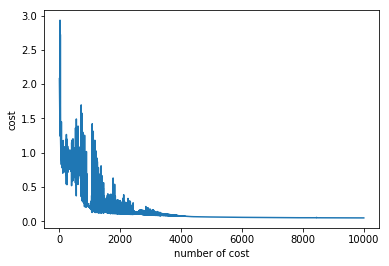

用时：5秒561毫秒
3 30
(3, 30)
预测结果：
[[0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1]
 [0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0]
 [1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0]]
实际结果：
[[0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0]
 [1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1]]
1
2
4
5
6
9
10
11
12
13
14
16
18
20
21
22
24
25
27
29
准确率是：33.33%


In [105]:
f=open('G:\\jupyter\\人工神经网络\\iris2.txt')
data_set=pd.read_csv(f,header=None)
X=data_set.iloc[:,0:4].values.T
Y=data_set.iloc[:,4:].values.T
Y = Y.astype('uint8')



x1= data_set.iloc[:, 0:4]
y1= data_set.iloc[:, 4:]
x_test=x1.iloc[120:,:].values.T
y_test=y1.iloc[120:,:].values.T
y_test = y_test.astype('uint8')

print(y_test)
print(str(y_test.shape))

start_time=datetime.datetime.now()
parameters=nn_model(X,Y,n_h=10,n_input=4,n_output=3,num_interations=10000)
end_time=datetime.datetime.now()
str1=str((end_time-start_time).seconds)
str2=str(round((end_time-start_time).microseconds/1000))
print("用时："+str1+"秒"+str2+"毫秒")

resultoutput=predict(parameters,x_test,y_test)